<a href="https://colab.research.google.com/github/vasudev006/S2Codebase/blob/main/exp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Experiment No 7
Evaluate surface integral using stoke's theorem



>**Case:** Evaluate the surface integral of the curl of the vector field $F(x,y,z)=(y,z,x)$ over the surface $S$, which is the part of the plane $z=1-x-y$ in the first octant, using Stoke's theorem.

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Define the variables
x , y , z = sp.symbols('x y z ')
# Define the vector field components
F = sp.Matrix([y , z , x])
#Define the surface z = 1- x - y
z_surf = 1 - x - y

#Define the parametrization of the surface using u and v
u , v = sp.symbols('u v')
param_x = u
param_y = v
param_z = 1 - u - v

#Compute the curl of F
curl_F = sp.Matrix([sp.diff(F[2], y)- sp.diff(F[1], z),
                    sp.diff(F[0], z) - sp.diff(F[2], x),
                    sp.diff(F[1], x) - sp.diff(F[0],y)])

#Parametrize the surface
r = sp.Matrix([param_x,param_y,param_z])

# Compute the partial derivatives of the parametrization
r_u_diff = r.diff(u)
r_v_diff = r.diff(v)

# Compute the normal vector to the surface
normal_vector = r_u_diff.cross(r_v_diff)

#Compute the dot product of the curl and the normal vector
integrand = curl_F.dot(normal_vector)

#Compute the surface integral over the region D in the uv-plane
integral_uv = sp.integrate(integrand, (v, 0, 1 - u), (u, 0 , 1))

#Display the result
integral_uv

-3/2

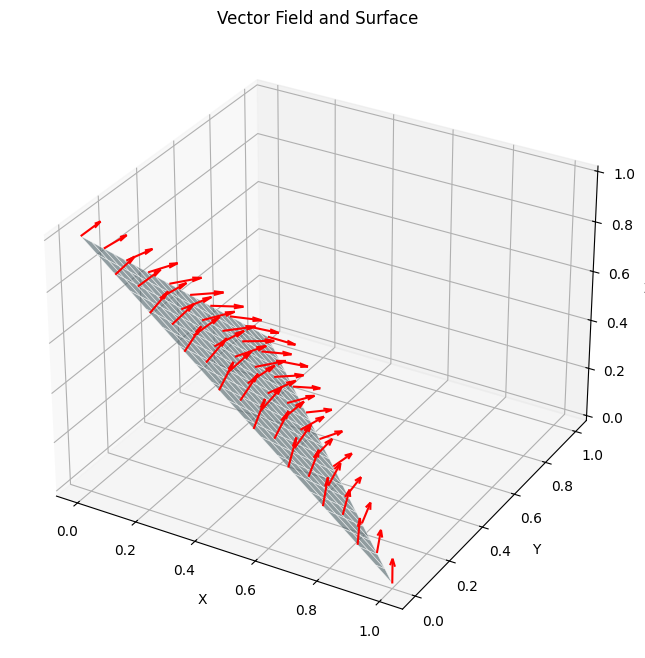

In [ ]:
 # Define the vector ield components
def F(x,y,z):
   return np.array([y,z,x])

#Define the grid for the surface
u_vals = np.linspace(0,1,20)
v_vals = np.linspace(0,1, 20)
U , V = np.meshgrid(u_vals, v_vals)
X = U
Y = V
Z = 1 - U - V

# Mask the values that are out of the first octant
mask = ( U + V > 1)
X[mask] = np.nan
Y[mask] = np.nan
Z[mask] = np.nan

#Create 3D plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')

#Plot the surface
ax.plot_surface(X,Y,Z, color = 'lightblue', alpha = 0.6 , edgecolor = 'w', linewidth = 0.5)

# Create a grid for the vector fiels arrows
x_vals = np.linspace(0,1,10)
y_vals = np.linspace(0,1,10)
X , Y = np.meshgrid(x_vals, y_vals)
Z = 1 - X - Y
# Mask the values that are out of the first octant
mask = (X + Y > 1)
X[mask] = np.nan
Y[mask] = np.nan
Z[mask] = np.nan

# Compute the vector field components at the grid points
U , V , W = F(X,Y,Z)

# Plot the vector field arrows
ax.quiver(X,Y,Z,U,V,W, length = 0.1,normalize = True, color = 'r')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Vector Field and Surface')
plt.show()

